In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,recall_score,precision_score, classification_report

In [63]:
df = pd.read_csv("/Users/anusrutamohanty/Desktop/Global_Pollution_Analysis.csv")

In [64]:
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

In [66]:
scaler = MinMaxScaler(feature_range=(0, 1))
cols_to_scale = [
    'CO2_Emissions (in MT)', 'Air_Pollution_Index', 'Water_Pollution_Index',
    'Soil_Pollution_Index', 'Industrial_Waste (in tons)', 'Energy_Consumption_Per_Capita (in MWh)'
]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [67]:
cols_to_add = ['Soil_Pollution_Index', 'Air_Pollution_Index', 'Water_Pollution_Index']
df['Total_Pollution'] = df[cols_to_add].sum(axis=1)

In [68]:
numeric_cols = df.select_dtypes(include=['number']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Creating a mask for rows to keep (not outliers in any numeric column)
mask = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Applying the mask to the original dataframe (keeping all columns)
df_clean = df[mask]

print("Original shape:", df.shape)
print("After removing outliers:", df_clean.shape)

Original shape: (200, 14)
After removing outliers: (198, 14)


In [69]:
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Year'] = le.fit_transform(df['Year'])

df['Avg_Pollution'] = df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']].mean(axis=1)
df['Pollution_Severity'] = pd.cut( df['Avg_Pollution'], bins=[0, 0.33, 0.66, 1.0], labels=['Low', 'Medium', 'High'])

Model Evaluation Metrics:
Accuracy : 0.6750
Precision: 0.4556
Recall   : 0.6750
F1 Score : 0.5440

Confusion Matrix:
 [[ 0  0  6]
 [ 0  0  7]
 [ 0  0 27]]

Detailed Classification Report:

              precision    recall  f1-score   support

         Low       0.00      0.00      0.00         6
      Medium       0.00      0.00      0.00         7
        High       0.68      1.00      0.81        27

    accuracy                           0.68        40
   macro avg       0.23      0.33      0.27        40
weighted avg       0.46      0.68      0.54        40



/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-pa

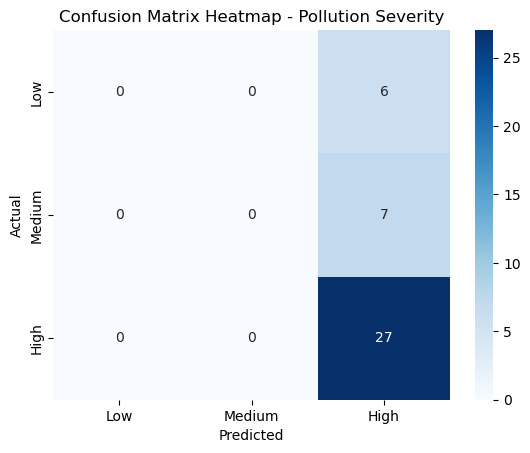

In [70]:
x = df[['CO2_Emissions (in MT)', 'Air_Pollution_Index', 'Water_Pollution_Index',
        'Soil_Pollution_Index', 'Industrial_Waste (in tons)', 'Energy_Consumption_Per_Capita (in MWh)',
        'Country','Year']]
y = le.fit_transform(df['Pollution_Severity'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nConfusion Matrix:\n", cm)
print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap - Pollution Severity')
plt.show()


Optimal number of neighbors (K): 15
KNN Model Evaluation Metrics:
Accuracy : 0.6750

Confusion Matrix:
 [[ 0  0  6]
 [ 0  0  7]
 [ 0  0 27]]

Detailed Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00         6
      Medium       0.00      0.00      0.00         7
        High       0.68      1.00      0.81        27

    accuracy                           0.68        40
   macro avg       0.23      0.33      0.27        40
weighted avg       0.46      0.68      0.54        40



/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


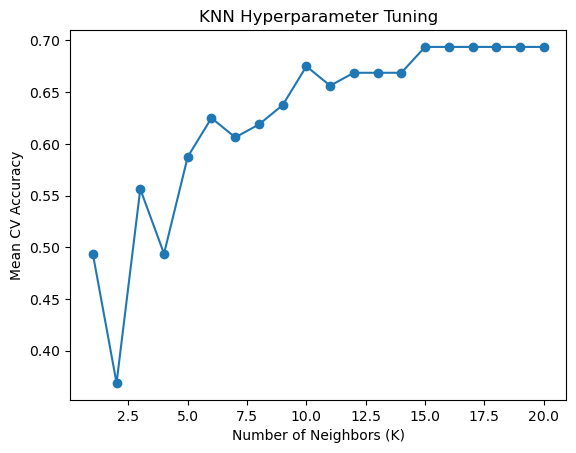

In [71]:
x = df[['CO2_Emissions (in MT)', 'Air_Pollution_Index', 'Water_Pollution_Index',
        'Soil_Pollution_Index', 'Industrial_Waste (in tons)', 'Energy_Consumption_Per_Capita (in MWh)',
        'Country','Year']]
y = le.fit_transform(df['Pollution_Severity'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Defining K range
param_grid = {'n_neighbors': range(1, 21)}

# Using GridSearchCV for finding the best K
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal number of neighbors (K): {best_k}")
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train, y_train)

y_pred = knn_best.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High'])

print("KNN Model Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nDetailed Classification Report:\n", report)
import matplotlib.pyplot as plt

results = grid_search.cv_results_
mean_scores = results['mean_test_score']
plt.plot(range(1, 21), mean_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean CV Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.show()

In [61]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10, 15],
    'criterion': ['gini','entropy']
}

# Initialize Decision Tree
dtree = DecisionTreeClassifier(random_state=42)

# Grid search with 5-fold CV
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Optimal Parameters:", best_params)
dtree_best = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    criterion=best_params['criterion'],
    random_state=42
)
dtree_best.fit(X_train, y_train)

# Predictions
y_pred = dtree_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Low','Medium','High'])

print("✅ Decision Tree Model Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nDetailed Classification Report:\n", report)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dtree_best, feature_names=X.columns, class_names=['Low','Medium','High'], filled=True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Global_Pollution_Analysis.csv'